In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
# Get pandas and postgres to work together
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as pd_sql

# We are also going to do some basic viz
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [5]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import statsmodels.api as sm

In [8]:
# There is a bug in matplotlib. You cannot set the rc parameters in the same
# cell that you use the "%matplotlib inline" magic command
plt.style.use('ggplot')
plt.rc('font', size=18)

In [9]:
cars  = pd.read_csv('./cars.csv')


In [10]:
cars

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93
678009,6114327.0,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11
678010,6114328.0,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82
678011,6114329.0,0,0.00274,B,4,0,60,50,B12,Regular,95,R26


In [11]:
cars.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region'],
      dtype='object')

In [12]:
short_cars = cars.sample(20000)

In [13]:
# This will help with plotting. Look up Pandas.Categorical for more methods ...
#cars.loc[:, 'ClaimNb'] = cars['ClaimNb'].astype('category')

In [14]:
short_cars.loc[short_cars['ClaimNb'] > 1, 'ClaimNb'] = 1

In [15]:
short_cars.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
161376,1139867.0,0,0.61,C,10,0,31,57,B3,Diesel,432,R24
273414,2147813.0,0,0.28,A,10,1,43,50,B10,Diesel,46,R24
634836,5098009.0,0,0.03,C,4,1,50,63,B4,Diesel,179,R23
474057,3239121.0,0,0.08,D,6,14,45,50,B1,Diesel,705,R11
71654,151141.0,0,0.24,D,6,8,35,50,B1,Diesel,741,R24


In [16]:
short_cars.loc[:, 'ClaimNb'] = short_cars['ClaimNb'].astype('category')

In [17]:
short_cars2 = cars.sample(20000)
short_cars2.loc[short_cars2['ClaimNb'] > 1, 'ClaimNb'] = 1

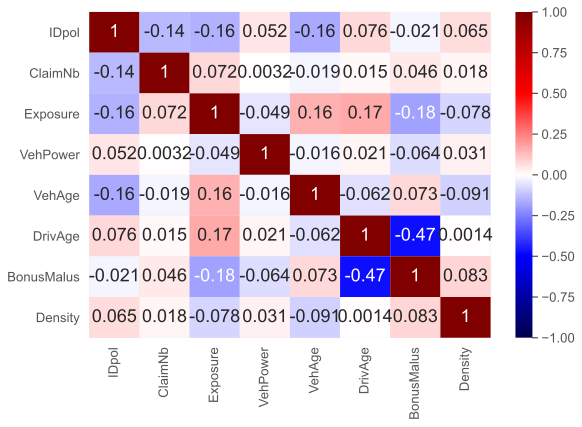

In [19]:
sns.heatmap(short_cars2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

There's no correlation

In [20]:
short_cars.dtypes

IDpol          float64
ClaimNb       category
Exposure       float64
Area            object
VehPower         int64
VehAge           int64
DrivAge          int64
BonusMalus       int64
VehBrand        object
VehGas          object
Density          int64
Region          object
dtype: object

In [21]:
short_cars.ClaimNb.value_counts()

0    19033
1      967
Name: ClaimNb, dtype: int64

In [23]:
df_train, df_test = train_test_split(short_cars,
                                     test_size=0.2, 
                                     random_state=42)

In [24]:
df_train.ClaimNb.value_counts()

0    15236
1      764
Name: ClaimNb, dtype: int64

In [ ]:
# We want to pick one feature to start that separates the two cases.
sns.pairplot(df_train, corner=True, height=1.5, plot_kws={'size': 2}, hue='ClaimNb');

mean pretty mich the same for all of them

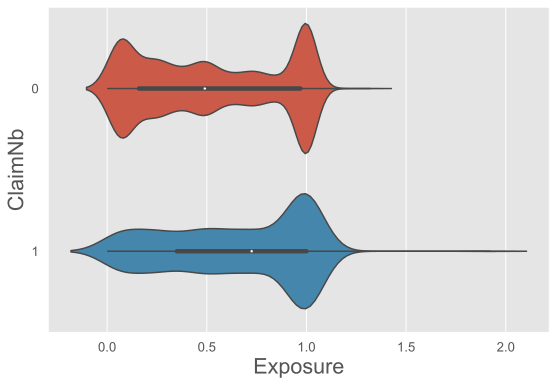

In [26]:
# `price_per_sqft` should work for our purposes(they should be different)
sns.violinplot(x='Exposure',
               y='ClaimNb',
               data=df_train);

In [ ]:
short_cars.columns

In [ ]:
cars

Simple Logistic Regression

In [ ]:
#type(short_cars.iloc[2]['target'])

In [27]:
# For this first example, we'll employ statsmodels
lm_1 = sm.Logit(df_train['ClaimNb'],  # with statsmodels, `y` comes first
                sm.add_constant(df_train[['Exposure']]))  # and then `x`
lm_1 = lm_1.fit()

Optimization terminated successfully.
         Current function value: 0.188793
         Iterations 7


In [28]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ClaimNb   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15998
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Feb 2021   Pseudo R-squ.:                 0.01586
Time:                        14:35:24   Log-Likelihood:                -3020.7
converged:                       True   LL-Null:                       -3069.4
Covariance Type:            nonrobust   LLR p-value:                 5.737e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5918      0.078    -46.289      0.000      -3.744      -3.440
Exposure       1.0182      0.105      9.686      0.000       0.812       1.224
==============================================================================
"""

In [29]:
# Let's go down the sklearn path, since this is better used in model pipelines
from sklearn.linear_model import LogisticRegression

In [30]:
# By default, LogisticRegression will fit an intercept, as we did with statsmodels
lm_1 = LogisticRegression(solver='newton-cg',  # For comparison, use the same solver as statsmodels default
                          C=10000)  # No regularization

lm_1.fit(df_train[['Exposure']], df_train['ClaimNb'])

LogisticRegression(C=10000, solver='newton-cg')

In [31]:
# We can see that the coefficient in question matches the one from statsmodels
print('intercept: ', round(lm_1.intercept_[0], 4))
print('price_per_sqft coef: ', round(lm_1.coef_[0][0], 4))

intercept:  -3.5918
price_per_sqft coef:  1.0182


In [32]:
df_eval = df_test.copy()

In [33]:
df_eval['pred'] = lm_1.predict(df_test[['Exposure']])

In [34]:
df_eval

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,pred
264053,2127803.0,0,0.03,C,7,8,44,50,B2,Diesel,125,R53,0
448090,3173367.0,0,0.17,C,7,8,67,50,B2,Diesel,283,R25,0
475405,3240695.0,0,0.16,E,11,11,51,90,B1,Regular,4116,R24,0
194596,1194597.0,0,0.53,C,7,0,25,106,B2,Regular,330,R93,0
30808,63914.0,1,1.00,E,5,6,60,50,B1,Regular,3317,R93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234106,2074006.0,0,1.00,A,5,20,49,50,B4,Diesel,12,R72,0
543766,4134944.0,0,0.61,E,5,11,41,50,B1,Diesel,6465,R11,0
318834,2230661.0,0,0.08,D,7,6,31,90,B3,Regular,883,R93,0
398676,3081349.0,0,1.00,C,6,2,68,50,B1,Regular,433,R93,0


In [35]:
df_eval.loc[:, 'pred'] = df_eval['pred'].astype('category')

In [37]:
df_eval.pred.value_counts()

0    4000
Name: pred, dtype: int64

Model predicts always only 0 because model Imbalanced, need to be handled

In [ ]:
df= short_cars.loc[:,['Exposure', 'DrivAge']]

In [38]:
X_train, X_test, label_train, label_test = train_test_split(short_cars[['Exposure']], short_cars['ClaimNb'], \
                                                            test_size=0.3, random_state=41)

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, label_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, label_test)))

The score for kNN is
Training:  95.20%
Test set:  95.08%


In [40]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, label_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, label_test)))

The score for logistic regression is
Training:  95.20%
Test set:  95.08%


In [41]:
print("Logistic score: {:6.4f}".format(logit.score(X_train,label_train)))

Logistic score: 0.9520


In [42]:
logit.predict_proba(X_test[:5])

array([[0.94290799, 0.05709201],
       [0.93094274, 0.06905726],
       [0.96388361, 0.03611639],
       [0.97032328, 0.02967672],
       [0.96924156, 0.03075844]])

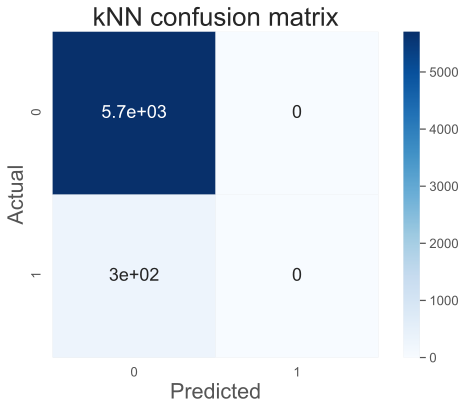

In [43]:
# Print confusion matrix for kNN
knn_confusion = confusion_matrix(label_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN confusion matrix');

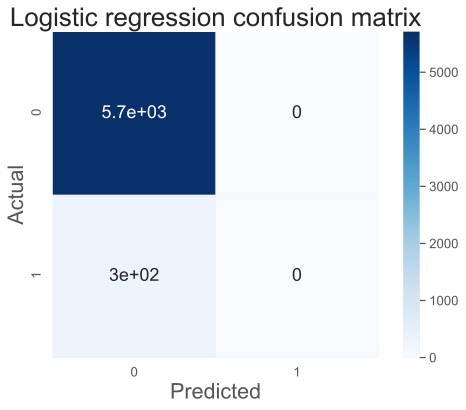

In [44]:
# Print confusion matrix for logistic regression
logit_confusion = confusion_matrix(label_test, logit.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic regression confusion matrix');

plt.savefig("confusion_matrix_logit_iris")

In [45]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(label_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',);
    plt.xlabel('prediction')
    plt.ylabel('actual')

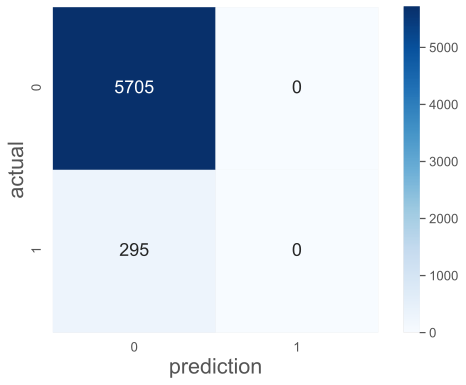

In [46]:
make_confusion_matrix(logit)

In [47]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(logit, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

From the plot I can see that models imbalanced, need to jhandle it

## Imbalance

In [48]:
# Make better use of Jupyter Notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [49]:
# Import the usual suspects. Any new functions will be introduced individually for clarity.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

In [50]:
# Helper function for printing confusion matrices (see: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823)

# prints confusion matrix as a heatmap which is nicer to visaulize

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [51]:
short_cars.ClaimNb.value_counts()

0    19033
1      967
Name: ClaimNb, dtype: int64

In [ ]:
# Print confusion matrix for kNN
knn_confusion = confusion_matrix(y_adasyn, knn.predict(X_adasyn))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('kNN confusion matrix');

In [ ]:
# Print confusion matrix for logistic regression
logit_confusion = confusion_matrix(y_adasyn, logit.predict(X_adasyn))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic regression confusion matrix');

plt.savefig("confusion_matrix_logit_iris")

In [52]:
X = short_cars.loc[:, 'Exposure']
y = short_cars.ClaimNb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

In [ ]:
#change X to array
X = X.to_numpy()

In [ ]:
X

In [53]:
target_count = short_cars.ClaimNb.value_counts()

In [54]:
# print class balance
print(f'Class 0: {target_count[0]}')
print(f'Class 1: {target_count[1]}')
print(f'Proportion: {round(target_count[0] / target_count[1], 2)} : 1')
print(f'Percentage of Majority Class: {round(target_count[0] / sum(target_count), 4)*100}')

Class 0: 19033
Class 1: 967
Proportion: 19.68 : 1
Percentage of Majority Class: 95.16


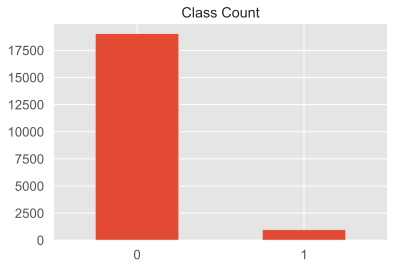

In [55]:
target_count.plot(kind='bar', title='Class Count', rot=0);

In [59]:
#X_train, y_train = pd.get_dummies(df_train.drop('Exposure',axis=1)), df_train['Exposure']

In [68]:
X_train, y_train = short_cars.drop('Exposure',axis=1), short_cars['Exposure']

SMOTE

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
df= short_cars.loc[:,['Exposure', 'DrivAge']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(df, short_cars['ClaimNb'], \
                                                            test_size=0.3, random_state=41)

X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train1,y_train1)

In [78]:
Counter(y_smoted)

Counter({0: 13328, 1: 13328})

In [79]:
# Build classifier and plot decision region with SMOTE data
clf_smote = SVC().fit(X_smoted.to_numpy(), y_smoted.to_numpy())

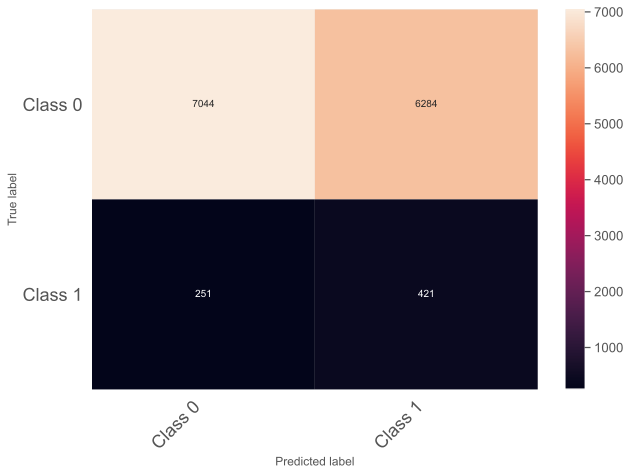

In [81]:
cm = print_confusion_matrix(confusion_matrix(y_train1, clf_smote.predict(X_train1)), ['Class 0', 'Class 1'])

ADASYN and 2 feautures

In [74]:
from imblearn.over_sampling import ADASYN

df= short_cars.loc[:,['Exposure', 'DrivAge']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(df, short_cars['ClaimNb'], \
                                                            test_size=0.3, random_state=41)

X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X_train1,y_train1)

In [ ]:
clf_adasyn = SVC().fit(X_adasyn, y_adasyn)

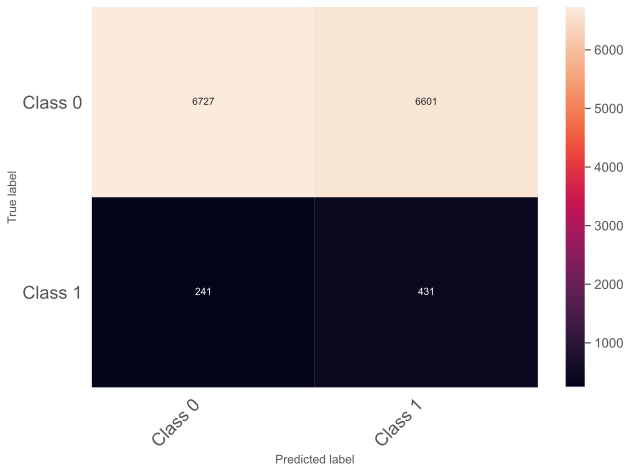

In [75]:

# print confusion matrix

## Code goes here ##
cm = print_confusion_matrix(confusion_matrix(y_train1, clf_adasyn.predict(X_train1)), ['Class 0', 'Class 1'])

All Features

In [ ]:
df= short_cars.drop('ClaimNb',axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(pd.get_dummies(df), short_cars['ClaimNb'], \
                                                            test_size=0.3, random_state=41)

Simple overfitting

In [92]:
clf = SVC().fit(X_train1, y_train1)

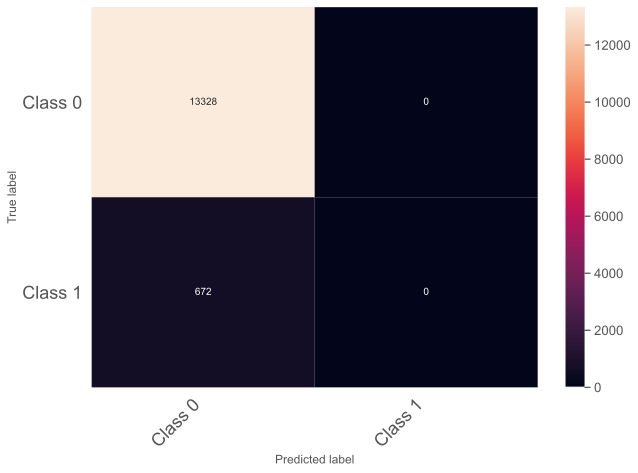

In [94]:
cm = print_confusion_matrix(confusion_matrix(y_train1, clf.predict(X_train1)), ['Class 0', 'Class 1'])

The confusion matrix and decision region plot above show that we are still getting the minority class wrong whenever a minority sample is close to the region where the bulk of the majority points lie.

In [95]:
from imblearn.over_sampling import RandomOverSampler

In [97]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train1,y_train1)

In [98]:
Counter(y_resampled)

Counter({0: 13328, 1: 13328})

In [100]:
clf_ros = SVC().fit(X_resampled, y_resampled)

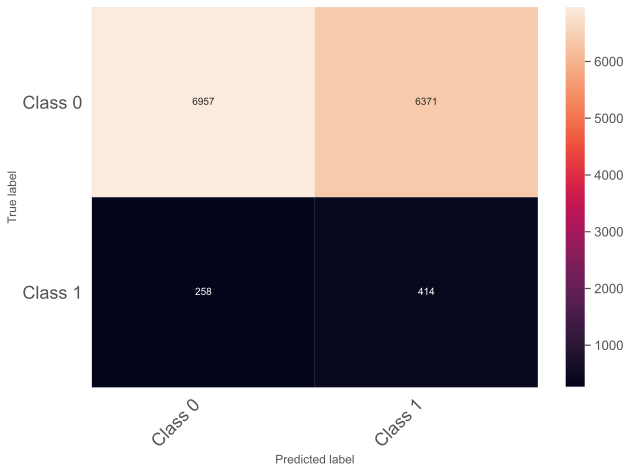

In [101]:
cm = print_confusion_matrix(confusion_matrix(y_train1, clf_ros.predict(X_train1)), ['Class 0', 'Class 1'])

ADASYN

In [84]:
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X_train1,y_train1)

In [85]:
clf_adasyn = SVC().fit(X_adasyn, y_adasyn)

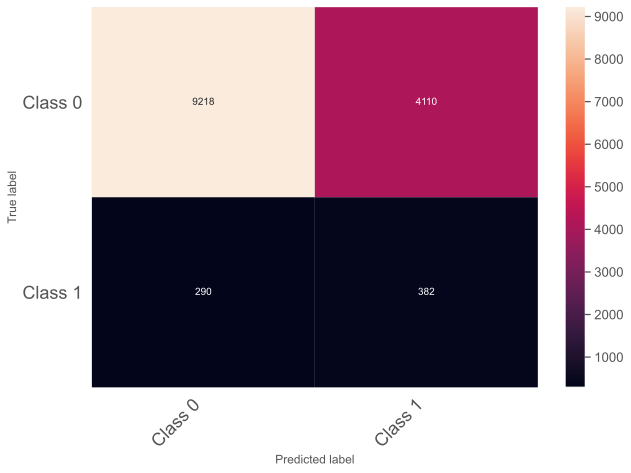

In [86]:
# print confusion matrix

## Code goes here ##
cm = print_confusion_matrix(confusion_matrix(y_train1, clf_adasyn.predict(X_train1)), ['Class 0', 'Class 1'])

SMOTE

In [87]:
#df= short_cars.loc[:,['Exposure', 'DrivAge']]
#X_train1, X_test1, y_train1, y_test1 = train_test_split(df, short_cars['ClaimNb'], \
#                                                            test_size=0.3, random_state=41)

X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train1,y_train1)

In [89]:
Counter(y_smoted)

Counter({0: 13328, 1: 13328})

In [90]:
# Build classifier and plot decision region with SMOTE data
clf_smote = SVC().fit(X_smoted.to_numpy(), y_smoted.to_numpy())

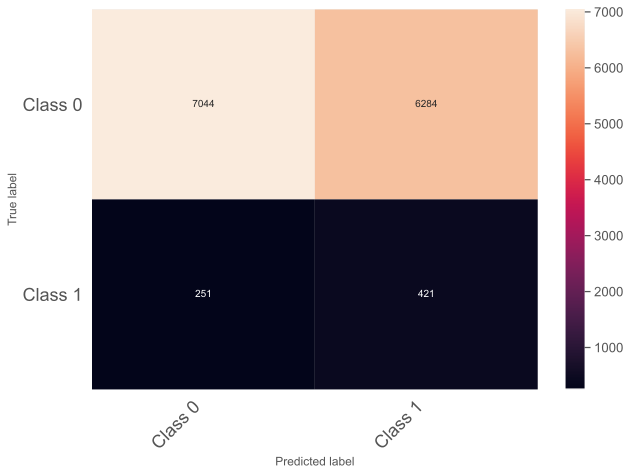

In [91]:
cm = print_confusion_matrix(confusion_matrix(y_train1, clf_smote.predict(X_train1)), ['Class 0', 'Class 1'])

I choose SMOTE for balnceing model because better predict Negative: so less risk to loose money